<a href="https://colab.research.google.com/github/chandansinghthakur/ML_assignments/blob/main/Assignment_3_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment_Decision_tree**

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Url = https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
cket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


# **Load the Dataset**

In [15]:
# Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [7]:
url = r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df = titanic[['Pclass',  'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Survived']]

In [11]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [12]:
df.shape

(891, 7)

In [13]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [19]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

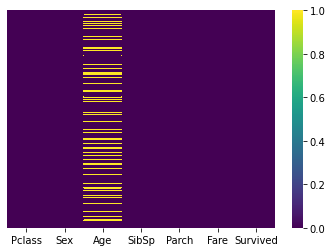

In [20]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

From the observation of heatmap, there are many null values in the **Age** column.

# Feature Engineering

We can't drop the age column as it is necessary for the final prediction so we have to categorize it.

In [21]:
def categ(cols):
  Age = cols[0]
  